# Libraries

In [96]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [97]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots(figsize=(12,10))
    cmap = sb.diverging_palette(220,10,as_cmap = True)
    s = sb.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,
                   annot = True,annot_kws = { 'fontsize' : 12 })

# import file

In [240]:
path="C:\\Users\\omarb\\Documents\\Introduction to AI\\Jupyter\\Datasets\\"
df = pd.read_csv(path+"CC GENERAL.csv",sep=',')
df.info()
df.isnull().sum() # Dataset seem already cleaned
df
df.describe()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Preprocess 

In [241]:
# drop CUST_ID
data=df.drop(['CUST_ID'],axis=1)
# fill MINIMUM_PAYMENTS'NaNs with PAYMENTS value.
data.MINIMUM_PAYMENTS.fillna(data.PAYMENTS,inplace=True)

In [242]:
data.dropna(axis=0,subset=['CREDIT_LIMIT'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

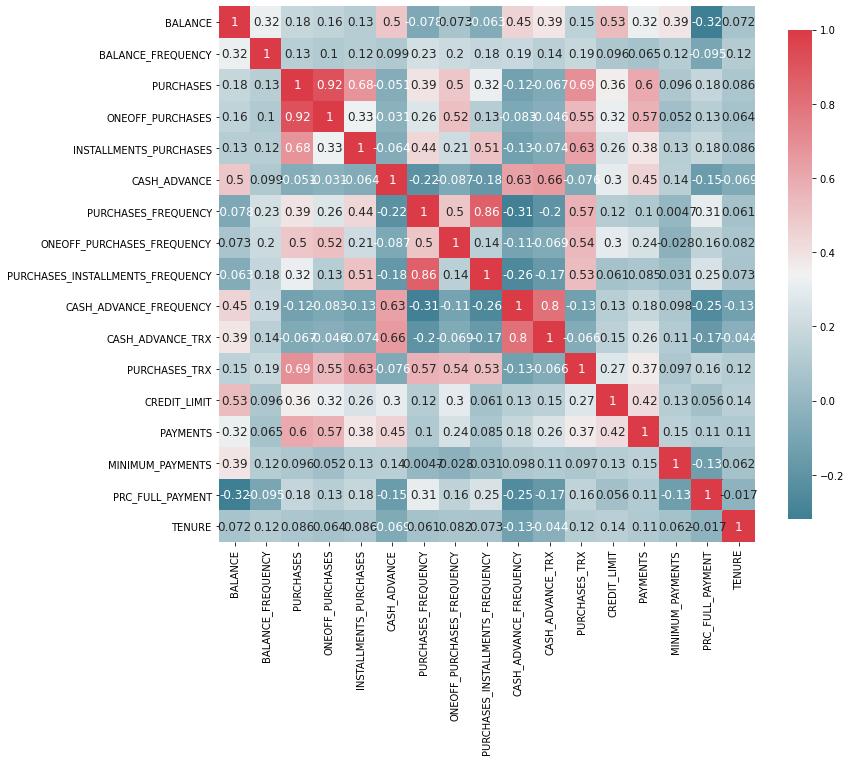

In [243]:
plot_correlation_map(data)

# Select subset

In [260]:
data=data[['BALANCE','PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT','PAYMENTS',
           'PRC_FULL_PAYMENT']]
data

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,95.40,0.166667,0.000000,0.000000,1000.0,201.802084,0.000000
1,3202.467416,0.00,0.000000,6442.945483,0.250000,7000.0,4103.032597,0.222222
2,2495.148862,773.17,1.000000,0.000000,0.000000,7500.0,622.066742,0.000000
3,1666.670542,1499.00,0.083333,205.788017,0.083333,7500.0,0.000000,0.000000
4,817.714335,16.00,0.083333,0.000000,0.000000,1200.0,678.334763,0.000000
...,...,...,...,...,...,...,...,...
8945,28.493517,291.12,1.000000,0.000000,0.000000,1000.0,325.594462,0.500000
8946,19.183215,300.00,1.000000,0.000000,0.000000,1000.0,275.861322,0.000000
8947,23.398673,144.40,0.833333,0.000000,0.000000,1000.0,81.270775,0.250000
8948,13.457564,0.00,0.000000,36.558778,0.166667,500.0,52.549959,0.250000


# Hierarchical Clustering

In [137]:
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clust_labels=model.fit_predict(data.values)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

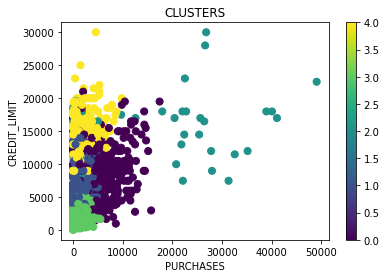

In [194]:
agglomerative=pd.DataFrame(clust_labels)
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ["PURCHASES"] , data ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
ax.set_title("CLUSTERS")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

## Dendrogram

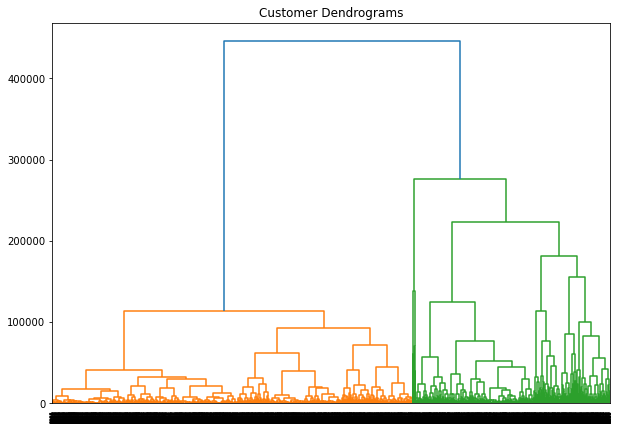

In [198]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="ward"))

# Partitional Clustering 

In [255]:
kmeans=KMeans(n_clusters=5, random_state=1)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

labels=pd.DataFrame({'LABEL':kmeans.labels_})
data = data.join(labels)

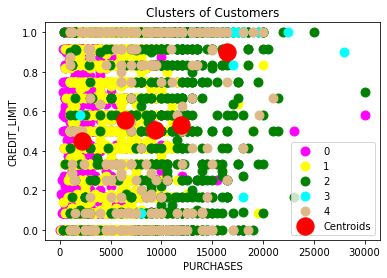

In [256]:
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 0],          
            data["PURCHASES_FREQUENCY"][data.LABEL == 0],s=80,c='magenta',label='0')
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 1],
           data["PURCHASES_FREQUENCY"][data.LABEL == 1],s=80,c='yellow',label='1')
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 2],
           data["PURCHASES_FREQUENCY"][data.LABEL == 2],s=80,c='green',label='2')
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 3], 
           data["PURCHASES_FREQUENCY"][data.LABEL == 3],s=80,c='cyan',label='3')
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 4], 
           data["PURCHASES_FREQUENCY"][data.LABEL == 4],s=80,c='burlywood',label='4')
plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:,2], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()
data=data.drop(['LABEL'],axis=1)

# Best K value

In [215]:
def sse(data,K):
    res = []
    for k in range(1,K):
        km = KMeans(n_clusters=k)
        km.fit(data)
        res.append(km.inertia_)
    return res

In [216]:
x = range(1,15)
y = sse(data,15)

<ipython-input-218-bf4078b0938f>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x,y,Marker='o')
<ipython-input-218-bf4078b0938f>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(x[1],y[1],Marker='D',color='red')


Text(0.5, 1.0, 'Elbow method')

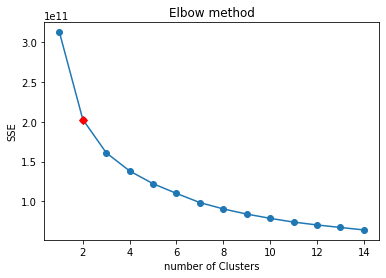

In [218]:
fig, ax = plt.subplots()
ax.plot(x,y,Marker='o')
ax.plot(x[1],y[1],Marker='D',color='red')
plt.xlabel('number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow method')

In [258]:
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

labels=pd.DataFrame({'LABEL':kmeans.labels_})
data = data.join(labels)

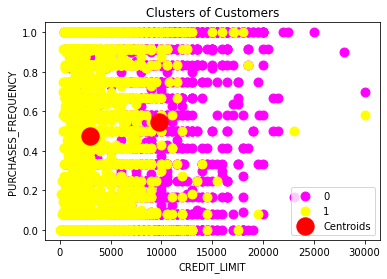

In [259]:
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 0],          
            data["PURCHASES_FREQUENCY"][data.LABEL == 0],s=80,c='magenta',label='0')
plt.scatter(data["CREDIT_LIMIT"][data.LABEL == 1],
           data["PURCHASES_FREQUENCY"][data.LABEL == 1],s=80,c='yellow',label='1')

plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 2], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES_FREQUENCY')
plt.legend()
plt.show()